<a href="https://colab.research.google.com/github/markquark125/Summer-MicroCredentials/blob/main/Social_Network_Ad_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Every notebook from now on follows this template

# Task 1: Identify the Problem

In this notebook we will conduct an analysis to classify who purchased something based on age, gender, and estimated salary.

# Task 2: Load the Libraries

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Task 3: Load the Data

In [3]:
dataset = pd.read_csv("https://raw.githubusercontent.com/markquark125/ML-Data/main/Social_Network_Ads.csv")

# Task 4: EDA (Exploratory Data Analysis)

In [5]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
dataset.isnull()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
395,False,False,False,False,False
396,False,False,False,False,False
397,False,False,False,False,False
398,False,False,False,False,False


In [7]:
dataset.isnull().value_counts()
# NO MISSING VALUES. Noice.

User ID  Gender  Age    EstimatedSalary  Purchased
False    False   False  False            False        400
dtype: int64

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [9]:
dataset.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


# Task 5: Data Visualization

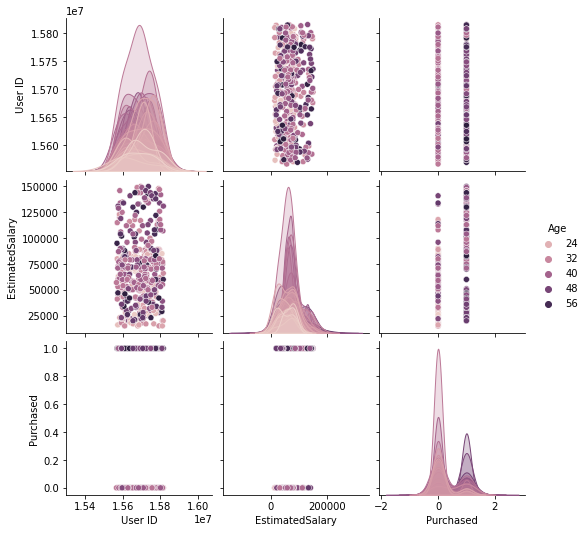

In [16]:
sns.pairplot(dataset, hue = 'Age')

# Task 6: Train, Test Split

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:,-1].values

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)

# Task 7: Feature Scaling

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
sc = StandardScaler()

In [25]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Task 8: Conduct Logistic Regression 

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
classifier = LogisticRegression(random_state=0)

In [28]:
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

# Task 9: Making Predictions

In [33]:
predictions = classifier.predict(X_test)

In [ ]:
# to be filled


print("Did not ")

# Task 10: Evaluating the Model

In [34]:
from sklearn.metrics import classification_report

In [35]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92        68
           1       0.89      0.75      0.81        32

    accuracy                           0.89       100
   macro avg       0.89      0.85      0.87       100
weighted avg       0.89      0.89      0.89       100



### Making the Confusion Matrix

In [36]:
from sklearn.metrics import confusion_matrix

In [37]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[65  3]
 [ 8 24]]


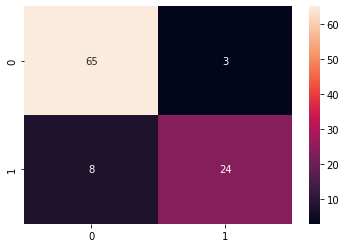

In [38]:
sns.heatmap(cm, annot=True)